In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from PIL import Image
from skimage import data, io, color

In [46]:
# Functions:

def create_bw_photo(infile, outfile, height=150, width=150):
    """
    This 
    """
    img = Image.open(infile)

    img = img.convert("L").resize((height, width))
    bw_image = np.array(img.getdata(), dtype = np.uint8).reshape(height, width)

    # Sanity check
    if img.size != bw_image.shape:
        print(f"ISSUE when sizing {in_dir + file}")

    io.imsave(outfile, bw_image)


def fade_image(infile, outfile, factor):
    """
    """
    img = Image.open(infile)

    np_image = np.array(img.getdata(), dtype = np.uint8).reshape(img.size[1], img.size[0],3)
    io.imsave(outfile, np_image)


def random_values(how_many, threshold):
    """
    """
    random_numbers = np.random.uniform(low=0, high=1, size=how_many)
    random_numbers = np.where(random_numbers < threshold, 0, 1)
    return(random_numbers)
    
    
def add_noise(img_array, threshold):
    """
    """
    width = img_array.shape[1]
    height = img_array.shape[0]

    random_values = random_values(height * width, threshold)

    for i in range(num_blotches):
        img_array[x_vals[i]:x_vals[i]+hole_size, y_vals[i]:y_vals[i]+hole_size, 0:3] = 0


In [23]:
train_colour_dir = "./pets/training_set/"
test_colour_dir = "./pets/test_set/"

train_bw_dir = "./pets_bw/training_set/"
test_bw_dir = "./pets_bw/test_set/"

count_training = 0
count_testing = 0

for pet in ['cat', 'dog']:
    file_list_train = os.listdir(train_colour_dir + "/" + pet)

    for file in file_list_train:
        in_file = train_colour_dir + "/" + pet + "/" + file
        out_file = train_bw_dir + "/" + pet + "/" + file

        create_bw_photo(in_file, out_file)

        count_training += 1


    file_list_test = os.listdir(test_colour_dir + "/" + pet)

    for file in file_list_test:
        in_file = test_colour_dir + "/" + pet + "/" + file
        out_file = test_bw_dir + "/" + pet + "/" + file

        create_bw_photo(in_file, out_file)

        count_testing += 1

print("Training Count:", count_training)
print("Testing Count:", count_testing)

# Fade out data in 1000 cat and 1000 dog images

test_colour_dir = "./pets/test_set/"

noise_dir = "./pets_noise/"

max_images = 1000

for pet in ['cat', 'dog']:
    file_list = sorted(os.listdir(test_colour_dir + "/" + pet))

    image_count = 0

    for file in file_list:
        in_file = test_colour_dir +  pet + "/" + file
        out_file = noise_dir + pet + "/" + file

        fade_image(in_file, out_file, 0.9)
        image_count += 1
        if image_count == max_images:
            break



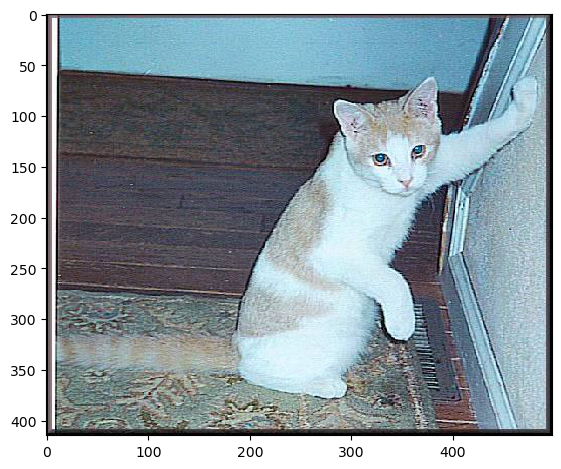

In [24]:
img = Image.open(noise_dir + "cat/cat.4001.jpg")
xxx = np.array(img.getdata(), dtype = np.uint8).reshape(img.size[1], img.size[0],3)
io.imshow(xxx)

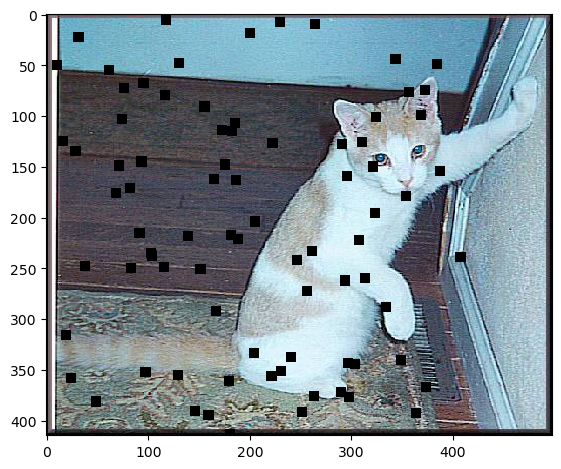

In [27]:
yyy = xxx.copy()

num_holes = 100

add_noise(yyy, num_holes)

io.imshow(yyy)

In [29]:
np.random.randint(0, high=2, size=50)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0])

In [48]:
random_numbers = np.random.uniform(low=0, high=1, size=40)
random_numbers

array([0.47077382, 0.58698382, 0.25366395, 0.69027465, 0.01902718,
       0.62041743, 0.21689116, 0.19448719, 0.22876637, 0.55291573,
       0.32026757, 0.48447445, 0.33258464, 0.54947163, 0.58213402,
       0.45638019, 0.20217882, 0.50680479, 0.37089776, 0.62405048,
       0.74435677, 0.16693921, 0.9051033 , 0.61094331, 0.36500798,
       0.0448701 , 0.24663033, 0.06336271, 0.07121314, 0.70473473,
       0.79443909, 0.79552277, 0.86779258, 0.28156521, 0.80935601,
       0.14377016, 0.11767276, 0.42569665, 0.63168978, 0.67142658])

In [47]:
random_values(100, 0.9)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])